In [1]:
# Import from the globals_and_helpers file
from globals_and_helpers import (
    PROJECT_DIR,
    MODELS_DIR,
    ORIG_IMAGE_DIR,
    TEMP_OUTPUTS_DIR,
    FINAL_OUTPUTS_DIR,
    TILE_SIZE,
    BASE_NAMES,
    normalize_image,
    plot_histogram,
    get_dapi_and_collagen_paths,
    convert_seconds_to_hms,
    get_base_name,
    check_image_dimensions,
    gen_STIFMap_tile_path,
    # save_stiffness_colormap,
    stitch_STIFMap_tiles,
    # stitch_images,
    gen_colormap_legend,
)

In [ ]:
from STIFMaps import STIFMap_generation
from STIFMaps.misc import get_step

import os
import re
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy import interpolate
from PIL import Image
import tifffile
import time

# STIFMap models
models = [
    os.path.join(MODELS_DIR, 'iteration_1171.pt'),
    os.path.join(MODELS_DIR, 'iteration_1000.pt'),
    os.path.join(MODELS_DIR, 'iteration_1043.pt'),
    os.path.join(MODELS_DIR, 'iteration_1161.pt'),
    os.path.join(MODELS_DIR, 'iteration_1180.pt')
]

# Parameters
STIFMap_SCALE_FACTOR = 0.5
# STIFMap_SCALE_FACTOR = 2.712
STIFMap_STEP = get_step(40, STIFMap_SCALE_FACTOR)
STIFMap_SQUARE_SIDE = get_step(224, STIFMap_SCALE_FACTOR)
STIFMap_BATCH_SIZE = 100

print('Step size is ' + str(STIFMap_STEP) + ' pixels')
print('Side length for a square is ' + str(STIFMap_SQUARE_SIDE) + ' pixels')

Step size is 80 pixels
Side length for a square is 448 pixels


Processing: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/IPMN_images/small_cropped_areas/15806_C0-1.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/IPMN_images/small_cropped_areas/15806_C1-1.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 3936, 3696)
Num squares in x direction is 41
Num squares in y direction is 44
Time taken to predict squares is 15.914945363998413
Time taken to predict squares is 31.523369073867798
Time taken to predict squares is 45.84066367149353
Time taken to predict squares is 60.244834423065186
Time taken to predict squares is 74.95136022567749
Total time taken is 75.65290403366089
Elapsed time: 1 minutes, 15.7 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/final_outputs/15806-1_STIFMap.png
Processing: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/IPMN_images/small_cropped_areas/15806_C0-2.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/IPMN_images/small_cropped_areas/15806_C1-2.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 3936, 3696)
Num squares in x direction is 41
Num squares in y direction is 44
Time taken to predict squares is 15.469061851501465
Time taken to predict squares is 30.154198169708252
Time taken to predict squares is 44.73693108558655
Time taken to predict squares is 59.41840982437134
Time taken to predict squares is 74.33101892471313
Total time taken is 74.97978281974792
Elapsed time: 1 minutes, 15.0 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/final_outputs/15806-2_STIFMap.png
Processing: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/IPMN_images/small_cropped_areas/15806_C0-3.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/IPMN_images/small_cropped_areas/15806_C1-3.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 3936, 3696)
Num squares in x direction is 41
Num squares in y direction is 44
Time taken to predict squares is 14.780219554901123
Time taken to predict squares is 29.387878894805908
Time taken to predict squares is 44.14407229423523
Time taken to predict squares is 58.83199119567871
Time taken to predict squares is 73.7250623703003
Total time taken is 74.25322675704956
Elapsed time: 1 minutes, 14.3 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/final_outputs/15806-3_STIFMap.png
Processing: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/IPMN_images/small_cropped_areas/15806_C0-4.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/IPMN_images/small_cropped_areas/15806_C1-4.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 2304, 2544)
Num squares in x direction is 27
Num squares in y direction is 24
Time taken to predict squares is 5.489789724349976
Time taken to predict squares is 10.948435306549072
Time taken to predict squares is 16.38422465324402
Time taken to predict squares is 22.118905544281006
Time taken to predict squares is 27.538559436798096
Total time taken is 27.767954349517822
Elapsed time: 27.8 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/final_outputs/15806-4_STIFMap.png


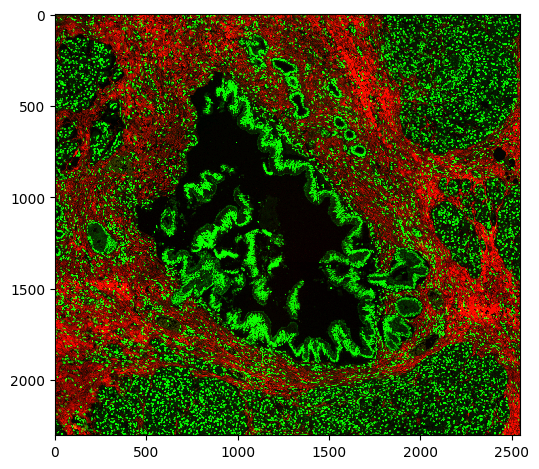

In [8]:
dap_files = [
    "15806_C0-1.tif", 
    "15806_C0-2.tif",
    "15806_C0-3.tif",
    "15806_C0-4.tif",
]

collagen_files = [
    "15806_C1-1.tif",
    "15806_C1-2.tif",
    "15806_C1-3.tif",
    "15806_C1-4.tif",
]

output_files = [
    "15806-1_STIFMap.png", 
    "15806-2_STIFMap.png",
    "15806-3_STIFMap.png",
    "15806-4_STIFMap.png",
]

for i in range(len(dap_files)):
    start_time = time.perf_counter()
    dapi_path = os.path.join(ORIG_IMAGE_DIR, "small_cropped_areas",dap_files[i])
    collagen_path = os.path.join(ORIG_IMAGE_DIR, "small_cropped_areas",collagen_files[i])
    output_path = os.path.join(FINAL_OUTPUTS_DIR, output_files[i])

   # Check if the tile has already been processed
    if not os.path.exists(dapi_path) or not os.path.exists(collagen_path):
        print(f"File not found: {dapi_path} and {collagen_path}")
        exit
    print(f"Processing: {dapi_path}, {collagen_path}")

    z_out = STIFMap_generation.generate_STIFMap(
        dapi=dapi_path,
        collagen=collagen_path,
        name="test",
        step=STIFMap_STEP,
        models=models,
        mask=False,
        batch_size=STIFMap_BATCH_SIZE,
        square_side=STIFMap_SQUARE_SIDE,
        save_dir=False
    )

    end_time = time.perf_counter()
    print("Elapsed time:", convert_seconds_to_hms(end_time - start_time))
    output_image = np.mean(z_out, axis=0)

    # Ensure the output directory exists
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save the output image without normalization
    # plt.imsave(output_path, output_image, cmap="viridis")
    print(f"Saved image: {output_path}")

In [8]:
def gen_STIFMap_tile(dapi_path, collagen_path, name, step, models, batch_size, square_side, check_existing=True):
    """
    Generate and save the STIFMap for a given tile.

    Parameters:
    - dapi_path: Path to the DAPI image.
    - collagen_path: Path to the collagen image.
    - name: Name associated with the STIFMap.
    - step: Step size for processing.
    - models: Models used for STIFMap generation.
    - batch_size: Batch size for processing.
    - square_side: Side length of the square for processing.
    - check_existing: Flag to check if the tile has already been processed.
    """
    output_path = gen_STIFMap_tile_path(dapi_path)

    # Check if the tile has already been processed
    if check_existing and os.path.exists(output_path):
        print(f"Skipping already processed tile: {dapi_path} and {collagen_path}")
        return

    start_time = time.perf_counter()

    z_out = STIFMap_generation.generate_STIFMap(
        dapi=dapi_path,
        collagen=collagen_path,
        name=name,
        step=step,
        models=models,
        mask=False,
        batch_size=batch_size,
        square_side=square_side,
        save_dir=False
    )

    end_time = time.perf_counter()
    print("Elapsed time:", convert_seconds_to_hms(end_time - start_time))

    # Calculate the mean output image along the first axis
    output_image = np.mean(z_out, axis=0)

    # Ensure the output directory exists
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save the output image without normalization
    plt.imsave(output_path, output_image, cmap="viridis")
    print(f"Saved image: {output_path}")

    # Save the raw stiffness values as a NumPy array
    stiffness_values_path = output_path.replace(".png", ".npy")
    np.save(stiffness_values_path, output_image)
    print(f"Saved stiffness values: {stiffness_values_path}")

# Function to check if a tile has already been processed
def is_tile_completed(output_path):
    return os.path.exists(output_path)

# dapi_path, collagen_path = get_dapi_and_collagen_paths(
#     base_name=BASE_NAMES[0], orig_image_dir=ORIG_IMAGE_DIR
# )
# print(f"dapi_path={dapi_path}, collagen_path={collagen_path}")
# gen_STIFMap_tile(
#     # dapi_path=dapi_path,
#     # collagen_path=collagen_path,
#     dapi_path='/home/steve/Projects/WeaverLab/STIFMaps/temp_outputs/27620/IPMN_tiles/27620_C0_0_0.tif',
#     collagen_path='/home/steve/Projects/WeaverLab/STIFMaps/temp_outputs/27620/IPMN_tiles/27620_C1_0_0.tif',
#     name='test',
#     step=STIFMap_STEP,
#     models=models,
#     batch_size=STIFMap_BATCH_SIZE,
#     square_side=STIFMap_SQUARE_SIDE,
#     check_existing=True  # Set to True to check if the file already exists
# )

In [9]:
def get_base_file_name(file_path):
    # Extract the file name without the extension
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    # Keep only the first two parts (e.g., '27620_C0') by splitting on '_'
    base_name = "_".join(file_name.split("_")[:2])
    return base_name

# Generate the STIFMaps for all the tiles for a base image
def gen_STIFMap(base_name):
    dapi_path, collagen_path = get_dapi_and_collagen_paths(base_name, orig_image_dir=ORIG_IMAGE_DIR)
    base_name_C0 = get_base_file_name(dapi_path)
    base_name_C1 = get_base_file_name(collagen_path)    
    
    # Automatically determine num_rows and num_cols based on filenames
    tile_pattern_C0 = re.compile(rf"{base_name_C0}_(\d+)_(\d+)\.tif")
    tile_pattern_C1 = re.compile(rf"{base_name_C1}_(\d+)_(\d+)\.tif")

    # tile_pattern = re.compile(rf"{base_name_C0}_(\d+)_(\d+)\.tif")
    tile_image_dir = os.path.join(TEMP_OUTPUTS_DIR, base_name, "IPMN_tiles")
    
    # Dictionary to store how many columns exist per row
    row_col_map = {}
    
    # Loop through files and match patterns
    for file in os.listdir(tile_image_dir):
        # match = tile_pattern.match(file)
        match_C0 = tile_pattern_C0.match(file)
        match_C1 = tile_pattern_C1.match(file)

        if match_C0 or match_C1:
            match = match_C0 or match_C1
            row, col = map(int, match.groups())
            row_col_map.setdefault(row, set()).add(col)
            # print(f"Matched Row: {row}, Column: {col}")
    
    # Find the maximum number of columns
    if not row_col_map:
        raise ValueError("No matching files found in the directory.")
    
    max_cols = max(len(cols) for cols in row_col_map.values())
    
    # Select only rows with the full set of columns
    valid_rows = sorted([row for row, cols in row_col_map.items() if len(cols) == max_cols])
    num_rows = len(valid_rows)
    num_cols = max_cols

    # print("Row to Columns mapping:", row_col_map)
    # print("Valid rows with full columns:", valid_rows)
    
    print(f"Detected grid size: {num_rows} rows x {num_cols} columns")
    
    # Create a list of file names for C0 and C1 tiles
    # C0_files = [f"{base_name_C0}_{i}_{j}.tif" for i in range(num_rows) for j in range(num_cols)]
    # C1_files = [f"{base_name_C1}_{i}_{j}.tif" for i in range(num_rows) for j in range(num_cols)]
    
    # Main: Loop through all the tiled C0 and C1 images and pass each one to run_STIFMap()
    for row in valid_rows:  # Iterate only over rows with full columns
        for col in range(num_cols):
            dapi_path = os.path.join(tile_image_dir, f"{base_name_C0}_{row}_{col}.tif")
            collagen_path = os.path.join(tile_image_dir, f"{base_name_C1}_{row}_{col}.tif")
    
            # Ensure files exist before processing
            if not os.path.exists(dapi_path) or not os.path.exists(collagen_path):
                print(f"Skipping missing tile: {dapi_path} or {collagen_path}")
                continue
            
            output_path = gen_STIFMap_tile_path(dapi_path)
            # output_path = gen_output_path(dapi_path)
            
            if is_tile_completed(output_path):
                print(f"Skipping already processed tile: {dapi_path} and {collagen_path}")
                continue

            print(f"Generating STIFMap for {dapi_path}, {collagen_path}")
            gen_STIFMap_tile(
                dapi_path, collagen_path, name=base_name, step=STIFMap_STEP,
                models=models, batch_size=STIFMap_BATCH_SIZE, square_side=STIFMap_SQUARE_SIDE,
                check_existing=True
            )
    
    stitched_output_path = os.path.join(FINAL_OUTPUTS_DIR, f"{base_name}_STIFMap_stitched.png")
    stitch_STIFMap_tiles(base_name)
    # save_stiffness_colormap(stitched_output_path, base_name)
    gen_colormap_legend(base_name)

# gen_STIFMap(base_name=BASE_NAMES[0])

In [ ]:
for base_name in BASE_NAMES:
    gen_STIFMap(base_name=base_name)

Detected grid size: 6 rows x 7 columns
Skipping already processed tile: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/27620/IPMN_tiles/27620_C0_0_0.tif and /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/27620/IPMN_tiles/27620_C1_0_0.tif
Skipping already processed tile: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/27620/IPMN_tiles/27620_C0_0_1.tif and /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/27620/IPMN_tiles/27620_C1_0_1.tif
Skipping already processed tile: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/27620/IPMN_tiles/27620_C0_0_2.tif and /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/27620/IPMN_tiles/27620_C1_0_2.tif
Skipping already processed tile: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/27620/IPMN_tiles/27620_C0_0_3.tif and /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/27620/IPMN_tiles/27620_C1_0_3.tif
Skipp

/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 28.420268297195435
Time taken to predict squares is 56.02031993865967
Time taken to predict squares is 83.57071828842163
Time taken to predict squares is 112.24456071853638
Time taken to predict squares is 141.59219670295715
Total time taken is 142.68782091140747
Elapsed time: 2 minutes, 22.7 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_1_6.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_1_6.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_1_7.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_1_7.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 27.521317958831787
Time taken to predict squares is 57.62689280509949
Time taken to predict squares is 85.79788827896118
Time taken to predict squares is 113.36605954170227
Time taken to predict squares is 140.69404935836792
Total time taken is 141.63808345794678
Elapsed time: 2 minutes, 21.7 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_1_7.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_1_7.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_1_8.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_1_8.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 27.574033975601196
Time taken to predict squares is 55.47292876243591
Time taken to predict squares is 83.15194344520569
Time taken to predict squares is 110.02028131484985
Time taken to predict squares is 136.94498205184937
Total time taken is 137.96187710762024
Elapsed time: 2 minutes, 18.0 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_1_8.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_1_8.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_1_9.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_1_9.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 28.616812705993652
Time taken to predict squares is 55.62391781806946
Time taken to predict squares is 81.99907445907593
Time taken to predict squares is 108.75988507270813
Time taken to predict squares is 136.8002393245697
Total time taken is 137.9770700931549
Elapsed time: 2 minutes, 18.0 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_1_9.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_1_9.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_1_10.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_1_10.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 27.877903699874878
Time taken to predict squares is 55.77761793136597
Time taken to predict squares is 83.64714241027832
Time taken to predict squares is 111.35426712036133
Time taken to predict squares is 139.7095971107483
Total time taken is 140.78511214256287
Elapsed time: 2 minutes, 20.8 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_1_10.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_1_10.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_2_0.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_2_0.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 27.64400601387024
Time taken to predict squares is 55.18117117881775
Time taken to predict squares is 83.5850121974945
Time taken to predict squares is 111.12027788162231
Time taken to predict squares is 138.90482187271118
Total time taken is 140.0247344970703
Elapsed time: 2 minutes, 20.1 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_0.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_0.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_2_1.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_2_1.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 28.31888246536255
Time taken to predict squares is 57.48408269882202
Time taken to predict squares is 88.16103553771973
Time taken to predict squares is 115.35233235359192
Time taken to predict squares is 142.04148530960083
Total time taken is 143.2084195613861
Elapsed time: 2 minutes, 23.2 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_1.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_1.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_2_2.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_2_2.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 27.15355110168457
Time taken to predict squares is 56.70262265205383
Time taken to predict squares is 85.08213496208191
Time taken to predict squares is 113.58711338043213
Time taken to predict squares is 141.7580749988556
Total time taken is 142.9259376525879
Elapsed time: 2 minutes, 22.9 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_2.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_2.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_2_3.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_2_3.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 28.719794988632202
Time taken to predict squares is 57.289361238479614
Time taken to predict squares is 86.78963685035706
Time taken to predict squares is 114.49643230438232
Time taken to predict squares is 142.2052459716797
Total time taken is 143.40043687820435
Elapsed time: 2 minutes, 23.4 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_3.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_3.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_2_4.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_2_4.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 27.657081604003906
Time taken to predict squares is 56.65486025810242
Time taken to predict squares is 83.22373962402344
Time taken to predict squares is 110.05977368354797
Time taken to predict squares is 136.52785658836365
Total time taken is 137.6090817451477
Elapsed time: 2 minutes, 17.6 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_4.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_4.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_2_5.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_2_5.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 26.551504850387573
Time taken to predict squares is 53.39097499847412
Time taken to predict squares is 80.18895268440247
Time taken to predict squares is 106.97360062599182
Time taken to predict squares is 134.34107995033264
Total time taken is 135.35098552703857
Elapsed time: 2 minutes, 15.4 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_5.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_5.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_2_6.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_2_6.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 26.90571880340576
Time taken to predict squares is 55.33740592002869
Time taken to predict squares is 85.07557225227356
Time taken to predict squares is 114.30276012420654
Time taken to predict squares is 142.86296844482422
Total time taken is 143.9150528907776
Elapsed time: 2 minutes, 23.9 seconds
Saved image: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_6.png
Saved stiffness values: /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/STIFMap_tiles/7002_2_6.npy
Generating STIFMap for /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C0_2_7.tif, /home/steve/Projects/WeaverLab/STIFMaps-IPMN-Analysis/temp_outputs/7002/IPMN_tiles/7002_C1_2_7.tif
Device is cpu


/home/steve/.local/lib/python3.10/site-packages/STIFMaps/STIFMap_generation.py:145: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(np.moveaxis(im, 0, -1))


Image shape is (3, 5003, 5003)
Num squares in x direction is 57
Num squares in y direction is 57
Time taken to predict squares is 29.342283487319946
Time taken to predict squares is 58.92627787590027
Time taken to predict squares is 88.89422178268433
Time taken to predict squares is 118.64058542251587


In [ ]:
# Stitch the processed tiles back together
# stitched_output_path = os.path.join(STIFMaps_directory, f"{base_name[0]}_STIFMap_stitched_v2.png")
# base_name = BASE_NAMES[0]
# stitched_output_path = os.path.join(TEMP_DIR, f"{base_name}_STIFMap_stitched.png")
# stitch_images(stitched_output_path, base_name, image_format='png')

Detected grid size: 15 rows x 18 columns
Missing tile: 27620_STIFMap_13_3.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_4.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_5.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_6.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_7.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_8.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_9.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_10.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_11.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_12.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_13.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_14.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_15.png. Replacing with a white tile.
Missing tile: 27620_STIFMap_13_16.png. Replacing with a white tile.
Missing tile: 